## Predicting House Prices

In [1]:
# Loading Data
from keras.datasets import boston_housing

(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step


In [2]:
# Let's view our data
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


## Preparing the data

In [3]:
# Normalizing the data

mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

## Building Network

In [13]:
# Model Definition
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Input(shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model


## Validating using K-fold validation

In [14]:
# K-fold validation

import numpy as np
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]

for i in range(k):
    print("Processing Fold : ", i)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing Fold :  0
Processing Fold :  1
Processing Fold :  2
Processing Fold :  3


In [15]:
print("ALL SCORES ARE AS FOLLOWS:\n",all_scores)
print(np.mean(all_scores))

ALL SCORES ARE AS FOLLOWS:
 [2.1869423389434814, 2.594589948654175, 2.9746761322021484, 2.5334465503692627]
2.572413742542267


In [24]:
# Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("Processing Fold:", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    # Saving validation MAE for each epoch
    val_mae_history = history.history['val_mae']
    all_mae_histories.append(val_mae_history)


Processing Fold: 0
Processing Fold: 1
Processing Fold: 2
Processing Fold: 3


In [26]:
# building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

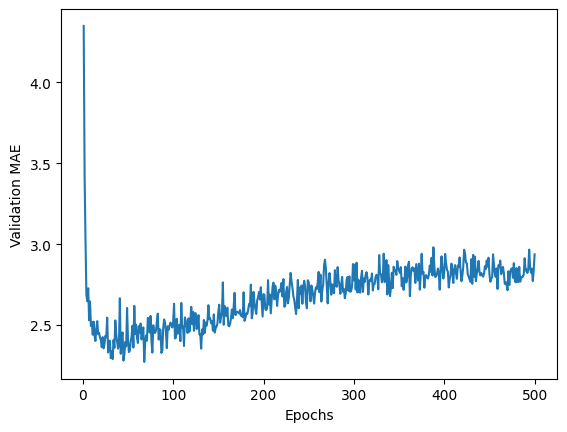

In [27]:
# Plotting validation scores
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [28]:
## Training the final model

model = build_model()
model.fit(train_data, train_labels,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.2864 - mae: 2.4316 
